In [215]:
!pip install annoy

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# Upload atau load dataset dari Kaggle
# (ubah path sesuai dataset masing-masing)
df = pd.read_csv('/content/drive/MyDrive/ML/train.csv')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [219]:
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

num_df = df.select_dtypes(include=['float64','int64'])

In [220]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
num_df_imputed = pd.DataFrame(imputer.fit_transform(num_df), columns=num_df.columns)

In [221]:
num_df_imputed.isnull().sum().sum()

np.int64(0)

In [222]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df_imputed)

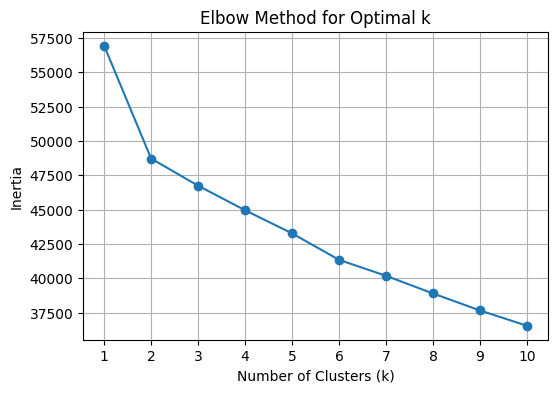

In [223]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid(True)
plt.show()

In [224]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

eps_values = np.arange(0.1, 5, 0.5)
min_samples_values = [5, 10, 15, 20]

best_dbscan_silhouette = -1
best_eps = -1
best_min_samples = -1
best_dbscan_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        if len(set(dbscan_labels)) > 1:
            dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)

            if dbscan_silhouette > best_dbscan_silhouette:
                best_dbscan_silhouette = dbscan_silhouette
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan_labels = dbscan_labels

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)
print(f"Best DBSCAN Silhouette Score: {best_dbscan_silhouette:.4f} with eps={best_eps} and min_samples={best_min_samples}")

Best DBSCAN Silhouette Score: 0.1631 with eps=4.6 and min_samples=20


In [225]:
# KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels_kmeans = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=4.6, min_samples=20)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Evaluasi
print("KMeans Silhouette:", silhouette_score(X_scaled, labels_kmeans))
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_kmeans))
print("DBSCAN Silhouette:", silhouette_score(X_scaled, labels_dbscan))
print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, labels_dbscan))

KMeans Silhouette: 0.13592632645621772
KMeans Davies-Bouldin: 2.2482609290237687
DBSCAN Silhouette: 0.1630648014859877
DBSCAN Davies-Bouldin: 5.449910908223047


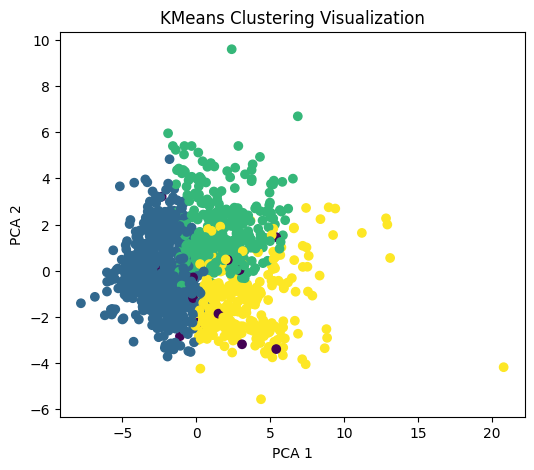

In [226]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

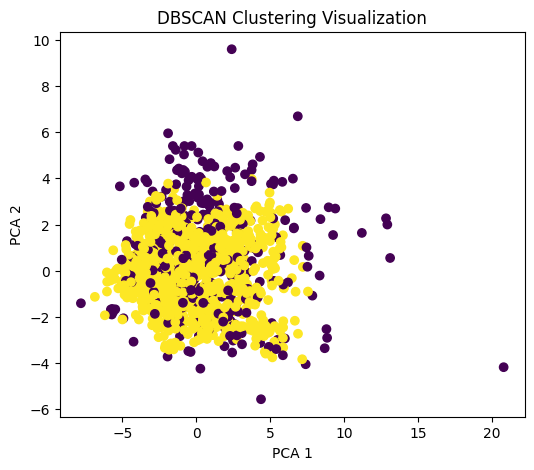

In [227]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=labels_dbscan, cmap='viridis')
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [228]:
# 6. ANN dengan Annoy
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Build index
for i in range(X_scaled.shape[0]):
    ann.add_item(i, X_scaled[i])
ann.build(10)

# Pilih query point (misal index ke-42)
np.random.seed(42)
query_indices = np.random.choice(X_scaled.shape[0], size=5, replace=False)

for query_idx in query_indices:
    neighbors, distances = ann.get_nns_by_item(query_idx, 6, include_distances=True)
    print(f"Query Point Index: {query_idx}")
    print("Nearest Neighbors and Distances:")
    for n, d in zip(neighbors[1:], distances[1:]):
        print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")

Query Point Index: 892
Nearest Neighbors and Distances:
Neighbor Index: 741 | Distance: 3.0244 | Cluster (KMeans): 1
Neighbor Index: 1225 | Distance: 3.5473 | Cluster (KMeans): 1
Neighbor Index: 925 | Distance: 4.0269 | Cluster (KMeans): 1
Neighbor Index: 1069 | Distance: 4.0340 | Cluster (KMeans): 1
Neighbor Index: 215 | Distance: 4.0357 | Cluster (KMeans): 1
Query Point Index: 1105
Nearest Neighbors and Distances:
Neighbor Index: 877 | Distance: 3.5396 | Cluster (KMeans): 3
Neighbor Index: 619 | Distance: 3.5577 | Cluster (KMeans): 3
Neighbor Index: 610 | Distance: 3.5702 | Cluster (KMeans): 3
Neighbor Index: 1043 | Distance: 3.7509 | Cluster (KMeans): 2
Neighbor Index: 423 | Distance: 3.9054 | Cluster (KMeans): 3
Query Point Index: 413
Nearest Neighbors and Distances:
Neighbor Index: 711 | Distance: 3.6531 | Cluster (KMeans): 1
Neighbor Index: 514 | Distance: 3.7128 | Cluster (KMeans): 1
Neighbor Index: 821 | Distance: 3.8159 | Cluster (KMeans): 1
Neighbor Index: 98 | Distance: 3.82

# Kesimpulan Singkat

**1. Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini dan jelaskan jawaban anda** <br>
KMeans lebih baik untuk dataset ini, karena data tabular seperti ini cenderung memiliki cluster yang kompak dan tidak terlalu banyak noise. Hasil KMeans lebih stabil dan mudah dievaluasi dengan Silhouette Score dan Davies-Bouldin Index. DBSCAN sering kali menghasilkan satu cluster besar atau banyak noise jika parameter tidak tepat, terutama pada data berdimensi tinggi.

**2. Nilai metrik terbaik (Silhouette, DBI).** <br>
Berdasarkan hasil perhitungan: <br>
KMeans Silhouette: 0.13592632645621772 <br>
KMeans Davies-Bouldin: 2.2482609290237687 <br>
DBSCAN Silhouette: 0.1630648014859877 <br>
DBSCAN Davies-Bouldin: 5.449910908223047 <br><br>
**KMeans lebih baik untuk dataset ini karena DBI lebih rendah dan cluster lebih kompak, meskipun Silhouette Score masih rendah.**

**3. Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang sama? Jelaskan jawaban anda.** <br>
Berdasarkan hasil query Annoy, menunjukkan bahwa tetangga terdekat cenderung berada dalam cluster yang sama, sehingga hasil clustering KMeans dapat dianggap cukup baik dan kompak.